<a href="https://colab.research.google.com/github/PreetiNegi04/FaceMashDetection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#configuring path of json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing face mask dataset

In [6]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 159M/163M [00:05<00:00, 42.7MB/s]
100% 163M/163M [00:05<00:00, 33.4MB/s]


In [7]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
!ls

 data   face-mask-dataset.zip  'kaggle .json'   sample_data


Imporing dependencies

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_folder = os.listdir('/content/data/with_mask')
print(with_mask_folder[:10])

['with_mask_9.jpg', 'with_mask_2565.jpg', 'with_mask_120.jpg', 'with_mask_3626.jpg', 'with_mask_2218.jpg', 'with_mask_1047.jpg', 'with_mask_2757.jpg', 'with_mask_867.jpg', 'with_mask_353.jpg', 'with_mask_628.jpg']


In [12]:
without_mask_folder = os.listdir('/content/data/without_mask')
print(without_mask_folder[:10])

['without_mask_713.jpg', 'without_mask_2820.jpg', 'without_mask_900.jpg', 'without_mask_2190.jpg', 'without_mask_1816.jpg', 'without_mask_3134.jpg', 'without_mask_2802.jpg', 'without_mask_3761.jpg', 'without_mask_714.jpg', 'without_mask_318.jpg']


In [13]:
print('Number of with mask images:', len(with_mask_folder))
print('Number of without mask images:', len(without_mask_folder))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels for two class images

In [14]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [22]:
labels = with_mask_labels + without_mask_labels

Displaying images

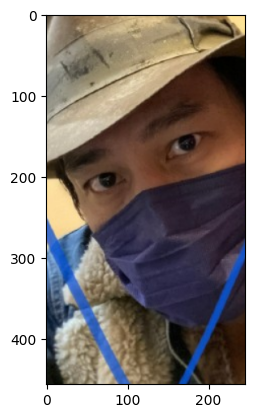

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_670.jpg')
imgplot = plt.imshow(img)
plt.show()

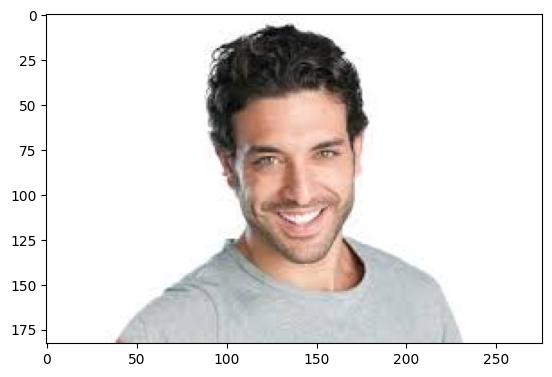

In [16]:
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing

1. Resize the images
2. Convert the images into numpy images

In [18]:
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_folder:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  data.append(np.array(image))

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_folder:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  data.append(np.array(image))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
len(data)

7553

In [23]:
X = np.array(data)
Y = np.array(labels)

Train test split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building a CNN**

In [27]:
import tensorflow as tf
from tensorflow import keras

In [29]:
number_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(number_of_classes, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [31]:
#training model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 24ms/step - loss: 0.3823 - acc: 0.8479 - val_loss: 0.2458 - val_acc: 0.9025
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2236 - acc: 0.9106 - val_loss: 0.2736 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1779 - acc: 0.9345 - val_loss: 0.1924 - val_acc: 0.9140
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1206 - acc: 0.9533 - val_loss: 0.2113 - val_acc: 0.9190
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.0962 - acc: 0.9641 - val_loss: 0.2062 - val_acc: 0.9240


Model evaluation

In [32]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.2362 - acc: 0.9292
Test Accuracy = 0.9291859865188599


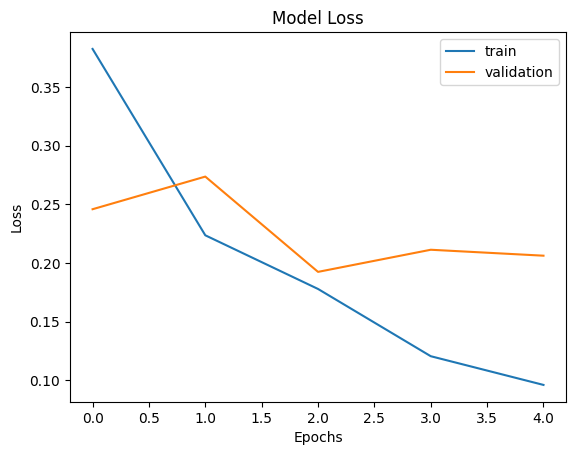

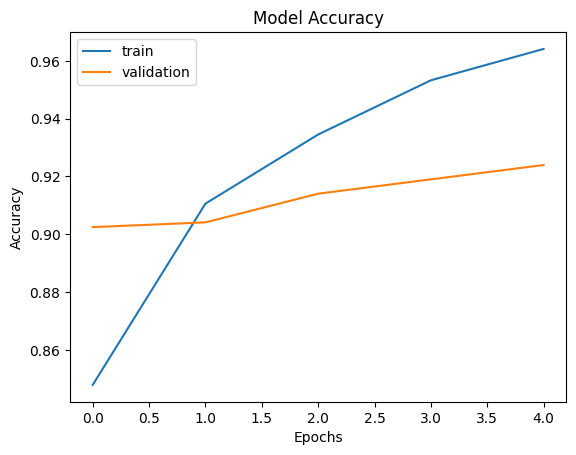

In [34]:
#plot loss value

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

#plot accuracy value

plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

Predictive System

path of image/content/data/without_mask/without_mask_1063.jpg


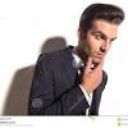

1/1 [==============================] - 0s 17ms/step
[[0.8528679 0.6790979]]
Person is not wearing mask


In [52]:
input_image_path = input("path of image")

input_image = cv2.imread(input_image_path)


input_image_resized = cv2.resize(input_image, (128,128))
cv2_imshow(input_image_resized)

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
prediction = np.argmax(input_prediction)
if prediction == 1:
  print('Person is wearing mask')
else:
  print('Person is not wearing mask')
